In [1]:
# Se importan las librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\j-oso\OneDrive\Escritorio\Datasets\LargestCompaniesInUSAbyReveneue.csv")
print(df) 

    Rank                 Name                    Industry  \
0      1              Walmart       General merchandisers   
1      2               Amazon  Retail and Cloud Computing   
2      3                Apple        Electronics industry   
3      4           CVS Health                  Healthcare   
4      5   UnitedHealth Group                  Healthcare   
..   ...                  ...                         ...   
95    96     General Dynamics        Airspace and defense   
96    97                  CHS     Agriculture cooperative   
97    98                 USAA                  Financials   
98    99  Northwestern Mutual                   Insurance   
99   100                Nucor                      Metals   

   Revenue (USD millions) Revenue growth  Employees  \
0                 572,754           2.4%  2,300,000   
1                 469,822          21.7%  1,608,000   
2                 365,817          33.2%    154,000   
3                 292,111          32.0%    258

In [3]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,General merchandisers,"572,754",2.4%,"2,300,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"469,822",21.7%,"1,608,000","Seattle, Washington"
2,3,Apple,Electronics industry,"365,817",33.2%,"154,000","Cupertino, California"
3,4,CVS Health,Healthcare,"292,111",32.0%,"258,000","Woonsocket, Rhode Island"
4,5,UnitedHealth Group,Healthcare,"287,597",11.8%,"350,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,General Dynamics,Airspace and defense,"38,469",8.7%,"103,100","Reston, Virginia"
96,97,CHS,Agriculture cooperative,"38,448",1.4%,"9,941","Inver Grove Heights, Minnesota"
97,98,USAA,Financials,"37,470",3.2%,"37,335","San Antonio, Texas"
98,99,Northwestern Mutual,Insurance,"36,751",8.8%,"7,585","Milwaukee, Wisconsin"


# Procesamiento de datos y Limpieza

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    int64 
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
# Removemos las comillas
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',','')
df['Employees'] = df['Employees'].str.replace(',','')

In [6]:
# Removemos el porcentaje
df['Revenue growth(%)'] = df['Revenue growth'].str.replace('%','')
df.drop(columns ='Revenue growth',inplace = True )

In [7]:
valores_nulos = df.isnull().any()
print("Valoes nulos: ")
print(valores_nulos[valores_nulos == False])
print(valores_nulos[valores_nulos == True])

Valoes nulos: 
Rank                      False
Name                      False
Industry                  False
Revenue (USD millions)    False
Employees                 False
Headquarters              False
Revenue growth(%)         False
dtype: bool
Series([], dtype: bool)


In [8]:
# Transformamos la columna empleados como entero
df[['Revenue (USD millions)','Revenue growth(%)']] = df[['Revenue (USD millions)','Revenue growth(%)']].astype('float')
df['Employees'] = df['Employees'].astype('int')

In [9]:
expand_one  = df['Headquarters'].str.split(',',expand = True)
print(expand_one)

                      0                1     2
0           Bentonville         Arkansas  None
1               Seattle       Washington  None
2             Cupertino       California  None
3            Woonsocket     Rhode Island  None
4            Minnetonka        Minnesota  None
..                  ...              ...   ...
95               Reston         Virginia  None
96  Inver Grove Heights        Minnesota  None
97          San Antonio            Texas  None
98            Milwaukee        Wisconsin  None
99            Charlotte   North Carolina  None

[100 rows x 3 columns]


In [10]:
# Revisamos la columna dos
col2_unique = expand_one[2].unique()
print(col2_unique)

[None ' Illinois']


In [11]:
 expand_one[expand_one[2]==' Illinois']

,0,1,2
65,Northfield Township,Cook County,Illinois


In [12]:
# Configuración de los valores necesarios
expand_one.at[66,0] = 'Cook County'
expand_one.at[66,1] = 'Illinois'

In [13]:
# Descartar la columna 2 porque solo hay una fila con valor in column 2
expand_one.drop(columns=2, axis =1 , inplace = True)

In [14]:
expand_one.head()

,0,1
0,Bentonville,Arkansas
1,Seattle,Washington
2,Cupertino,California
3,Woonsocket,Rhode Island
4,Minnetonka,Minnesota


In [15]:
df[['place_name','state']] = expand_one

In [16]:
# Eliminamos la columna
df.drop(columns = 'Headquarters', inplace = True)

In [17]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Employees,Revenue growth(%),place_name,state
0,1,Walmart,General merchandisers,572754.0,2300000,2.4,Bentonville,Arkansas
1,2,Amazon,Retail and Cloud Computing,469822.0,1608000,21.7,Seattle,Washington
2,3,Apple,Electronics industry,365817.0,154000,33.2,Cupertino,California
3,4,CVS Health,Healthcare,292111.0,258000,32.0,Woonsocket,Rhode Island
4,5,UnitedHealth Group,Healthcare,287597.0,350000,11.8,Minnetonka,Minnesota


In [18]:
#sacar los datos categoricos:
cat = [var for var in df.columns if df[var].dtype == 'object']
print('Variables categoricas: \n\n',cat)

#sacar los datos numericos:
num = [var for var in df.columns if df[var].dtype != 'object']
print('Variables numericas:\n\n',num)


Variables categoricas: 

 ['Name', 'Industry', 'place_name', 'state']
Variables numericas:

 ['Rank', 'Revenue (USD millions)', 'Employees', 'Revenue growth(%)']


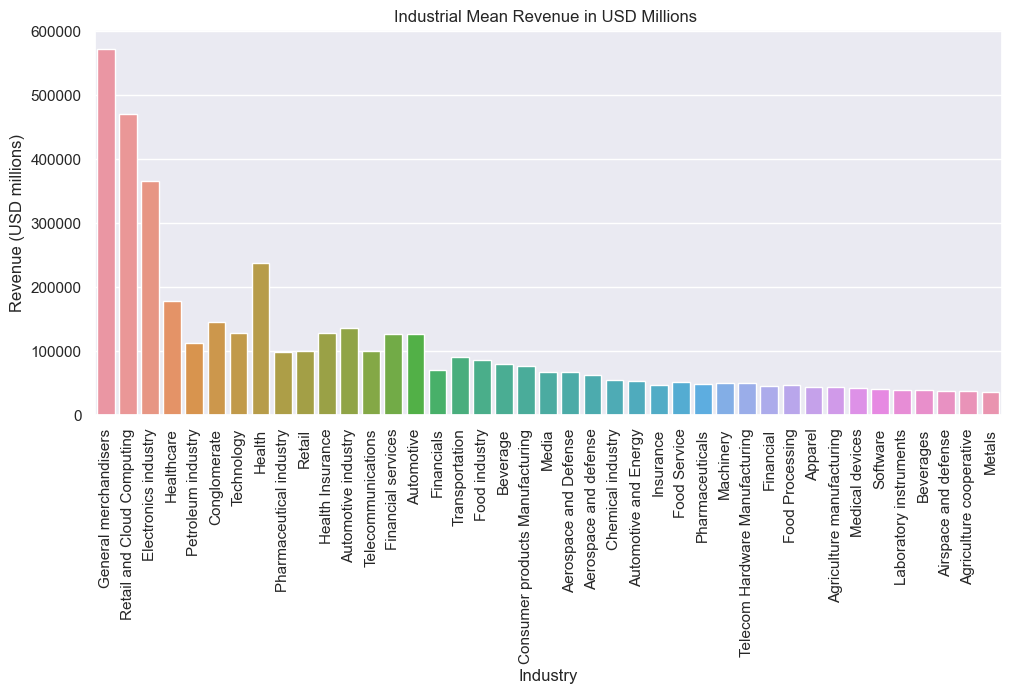

In [28]:
#Grafica de ingresos en millones de dolares:
sns.set(rc={'figure.figsize':(11.7,5)})
g = sns.barplot(data = df, x ='Industry',y='Revenue (USD millions)',errorbar = None)
g.set_title('Industrial Mean Revenue in USD Millions ')
plt.xticks(rotation = 90)
plt.show()

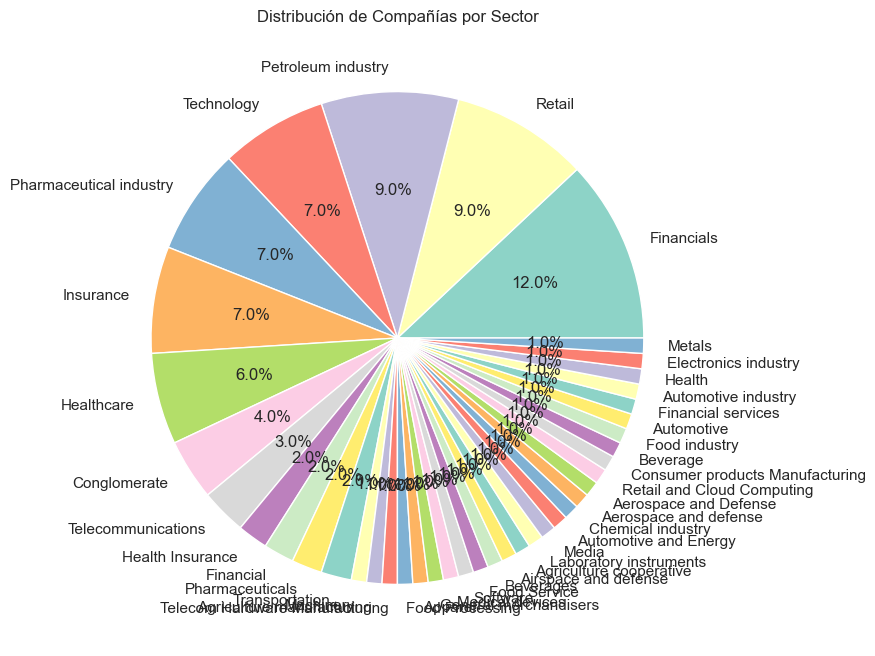

In [20]:
# Gráfico de pastel para mostrar la distribución de sectores
plt.figure(figsize=(8, 8))
df['Industry'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribución de Compañías por Sector')
plt.ylabel('')
plt.show()

# Observaciones o conclusiones

1. Los comerciantes generales, el comercio minorista y la computación en la nube, la industria electrónica y la salud son las industrias con mayores ingresos

In [34]:
df['revenue_per_employee_company'] = df['Revenue (USD millions)']/ df['Employees']
df_revenue = df.sort_values('revenue_per_employee_company',ascending = False)

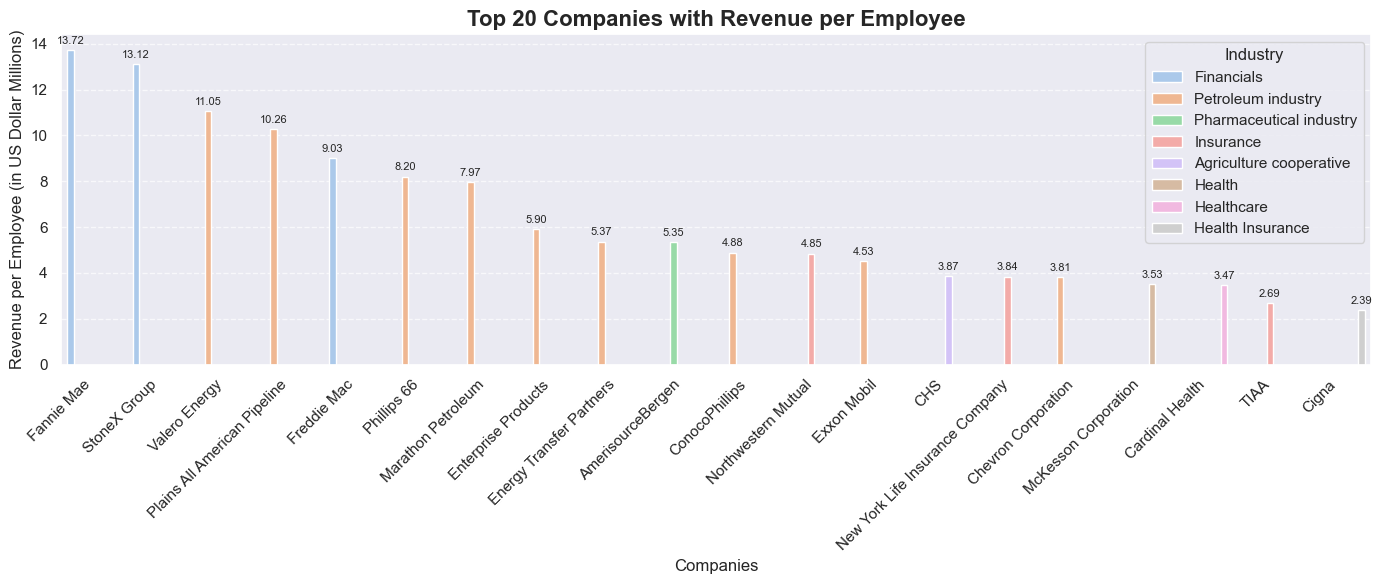

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño de la figura y los ejes
plt.figure(figsize=(14, 6))

# Crear la gráfica de barras
g = sns.barplot(
    data=df_revenue.iloc[0:20],
    x='Name',
    y='revenue_per_employee_company',
    hue='Industry',
    palette='pastel'  # Usar una paleta de colores pastel
)

# Agregar etiquetas de valor en las barras
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
               textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Ajustar el título y etiquetas de los ejes
plt.title('Top 20 Companies with Revenue per Employee', fontsize=16, fontweight='bold')
plt.xlabel('Companies', fontsize=12)
plt.ylabel('Revenue per Employee (in US Dollar Millions)', fontsize=12)

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar líneas de cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar los márgenes y espaciado entre barras
plt.tight_layout()

# Mostrar la gráfica
plt.show()


2. Fannie Mae, Stonex Group, Valero Energy son algunas de las principales empresas con ingresos por empleado.

In [48]:
ingresosporempleado = df.groupby('Industry')[['Revenue (USD millions)', 'Employees']].agg(np.sum)
ingresosporempleado.head()

,Revenue (USD millions),Employees
Industry,,
Aerospace and Defense,67044.0,114000
Aerospace and defense,62286.0,142000
Agriculture cooperative,38448.0,9941
Agriculture manufacturing,44024.0,75550
Airspace and defense,38469.0,103100
